In [1]:
import pandas as pd

# 读取文件
df = pd.read_csv('bike.csv')

print('数据基本信息：')
df.info()


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 剔除 id 属性列
df = df.drop(columns=['id'])

# 筛选出城市为 1 的数据，并去掉 city 列
city_1 = df[df['city'] == 1].drop(columns=['city'])

# 简化 hour 列，将 6 至 18 点替换为 1，其余替换为 0
hour_values = city_1['hour'].tolist()
for i in range(len(hour_values)):
    if 5 < hour_values[i] < 19:
        hour_values[i] = 1
    else:
        hour_values[i] = 0
city_1['hour'] = hour_values



# 筛选出用于建模的特征字段和目标字段
x = city_1.drop(columns=['y'])
y = pd.DataFrame(city_1['y'])

# 将目标列转换为 numpy 列向量
y = y.values.ravel()

# 将 DataFrame 对象转换为 numpy 数组
x = x.to_numpy()

# 将原始数据集按照 8:2 的比例划分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 使用 MinMaxScaler 对训练集数据进行归一化
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# 使用相同的 MinMaxScaler 对测试集数据进行归一化
x_test = scaler.transform(x_test)

# 构建线性回归模型
model = LinearRegression()

# 使用训练集训练模型
model.fit(x_train, y_train)

# 使用测试集进行预测
y_pred = model.predict(x_test)

# 计算均方根误差（RMSE），保留两位小数
sqrt_error = round(np.sqrt(mean_squared_error(y_pred, y_test)), 2)

# 输出 RMSE
print('模型预测的均方根误差为：', sqrt_error)



数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10000 non-null  int64  
 1   city        10000 non-null  int64  
 2   hour        10000 non-null  int64  
 3   is_workday  10000 non-null  int64  
 4   weather     10000 non-null  int64  
 5   temp_air    10000 non-null  float64
 6   temp_body   10000 non-null  float64
 7   wind        10000 non-null  int64  
 8   y           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB
模型预测的均方根误差为： 31.57


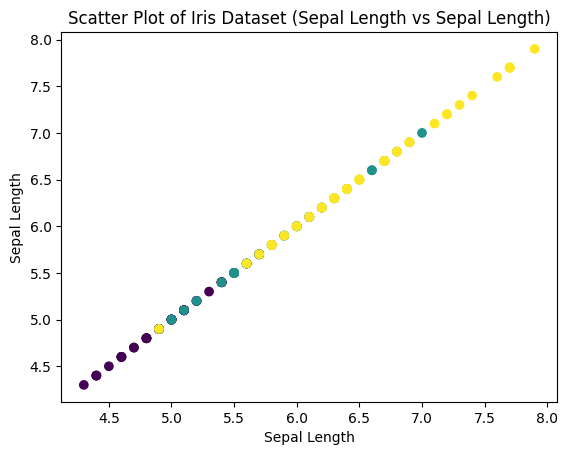

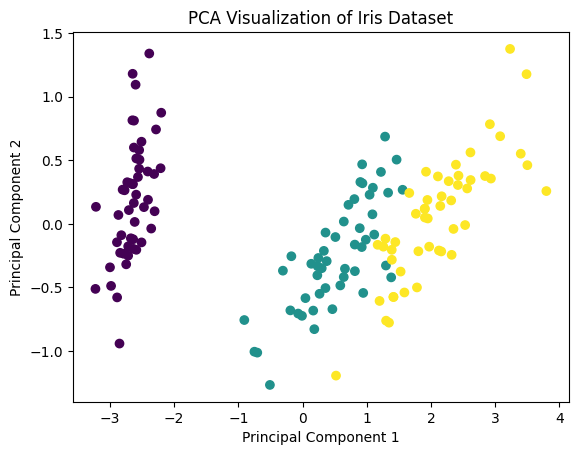

分类准确率: 1.0


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# 1. 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 2. 划分数据集，训练集比例0.2，设置随机种子为42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 以花萼长度（特征中的第一个维度）为横轴和纵轴绘制数据的散点图
plt.scatter(X[:, 0], X[:, 0], c=y)  # 这里横轴纵轴都是花萼长度（特征的第一个维度）
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Length')
plt.title('Scatter Plot of Iris Dataset (Sepal Length vs Sepal Length)')
plt.show()

# 4. 对鸢尾花数据的特征进行PCA降维，并可视化降维后的结果
pca = PCA(n_components=2)  # 设置降维到2维
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Dataset')
plt.show()

# 5. 以K=3训练K近邻分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 6. 在测试集上进行测试，并输出分类准确率
accuracy = knn.score(X_test, y_test)
print("分类准确率:", accuracy)